# **Universidad EAN**
##**Machine Learning 1**
##**Proyecto Final**

---
# **Exploración de la base de datos de salario de ingenieros de datos en 2024**
---

Presentado por
###**María Camila Tarazona Nieto**
###**Leyla Rocío Becerra Barajas**

# **Introducción**

La clasificación de géneros musicales es un área fascinante dentro del campo del aprendizaje automático y el procesamiento de señales. Con la creciente disponibilidad de grandes colecciones de música digital, existe una necesidad creciente de herramientas automatizadas que puedan categorizar la música en diferentes géneros. Este problema no solo es relevante para la organización y recuperación de música en grandes bases de datos, sino que también tiene aplicaciones en sistemas de recomendación, análisis de mercado y más.






# **Conjunto de datos**

El conjunto de datos "Music Genre Classification" disponible en Kaggle es una colección de características extraídas de archivos de música, destinadas a facilitar la clasificación de canciones en distintos géneros. El conjunto de datos incluye una variedad de características relevantes que capturan aspectos temporales, espectrales y de energía de las señales de audio, proporcionando una base sólida para el desarrollo y la evaluación de modelos de aprendizaje automático.

# **Objetivos**

El objetivo de este trabajo es desarrollar y evaluar varios modelos de aprendizaje supervisado para la clasificación de géneros musicales. Utilizando el conjunto de datos mencionado, se pretende:

- Explorar y comprender el conjunto de datos: Realizar un análisis exploratorio de los datos para identificar las características más relevantes y la distribución de los géneros.
- Preprocesamiento de datos: Preparar los datos para el modelado, incluyendo la normalización y codificación de características.
- Entrenamiento de modelos: Desarrollar varios modelos de aprendizaje supervisado, incluyendo regresión logística, árboles de decisión y Random Forest.
- Evaluación de modelos: Evaluar el rendimiento de cada modelo utilizando métricas apropiadas, como precisión, recall y F1 score.
- Mejora del modelo: Si es necesario, ajustar los hiperparámetros y mejorar el rendimiento del modelo seleccionado.

# **Importancia**

La clasificación precisa de géneros musicales tiene un impacto significativo en varias aplicaciones prácticas. Por ejemplo, en servicios de streaming de música, mejora la capacidad de recomendar nuevas canciones a los usuarios basadas en sus preferencias de género. En la industria de la música, facilita el análisis de tendencias y el marketing dirigido. Además, en contextos académicos y de investigación, contribuye al avance del procesamiento de señales y el aprendizaje automático aplicado a datos de audio.

# **Metodología**

Metodología
La metodología a seguir incluye los siguientes pasos:

1. Importar Librerías Necesarias: Utilizar librerías como pandas, numpy, scikit-learn y matplotlib para el análisis y modelado de datos.
2. Cargar y Explorar los Datos: Realizar un análisis exploratorio de datos para comprender la estructura y las características del conjunto de datos.
Preprocesamiento de Datos: Incluir técnicas como la normalización, codificación de variables categóricas y división de los datos en conjuntos de entrenamiento y prueba.
3. Desarrollo de Modelos: Entrenar varios modelos de aprendizaje supervisado y evaluar su rendimiento.
4. Evaluación: Utilizar métricas de evaluación para comparar los modelos y ajustar los hiperparámetros para mejorar el rendimiento del modelo seleccionado.
Con esta metodología, se espera obtener un modelo robusto y preciso para la clasificación de géneros musicales, proporcionando una solución eficiente y automatizada para la categorización de grandes colecciones de música

# **Librerías**
---
Instalación de paquetes, importar las librerías necesarias y cargar la base de datos

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

---
# **Versiones**
---
Este documento fue realizado con las siguientes versiones:

- Python 3.10.12
- Pandas 1.5.3
- Matplotlib 3.8

In [ ]:
#Versiones actuales
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)

Python 3.10.12
NumPy 1.25.2
Pandas 2.0.3


---
# **Base de datos**
---



## **URL Github**

Inicialmente se carga la base de datos.  Debido a que la misma se encuentra en un repositorio de Github, se designa una variable para almacenar el URL del repositorio.

In [ ]:
url='https://raw.githubusercontent.com/lrbecerrab/ML1/main/Entregas/ProyectoFinal/df_all_classes.csv'

## **Uso de un dataframe (pandas)**

Se crea una estructura de datos "dataframe" de la librería [pandas](https://https://pandas.pydata.org/) la cual facilita el análisis de los datos, puesto que  ya cuenta con funciones implementadas para ello.

In [ ]:
df = pd.read_csv(url)
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4,HipHop
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,Rock
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,Indie
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4,HipHop
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,Indie
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,Blues
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,Metal
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,Metal


##**Identificación de variables**

Se explora el archivo revisando el nombre, el tipo de información y cantidad de registros con valores nulos para cada variable.

In [ ]:
# Exploración inicial del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17996 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 17996 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    17996 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

##**Estadísticas principales**

Se explora el archivo revisando el nombre, el tipo de información y cantidad de registros con valores nulos para cada variable.

In [ ]:
# Exploración inicial de los datos - valores estadísticos totales calculados a las variables numéricas
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039
std,17.218436,0.166268,0.235373,3.012651,4.049151,0.480949,0.083576,0.310632,0.264499,0.159212,0.240195,29.571527,1.119891e+05,0.361618
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000
25%,33.000000,0.432000,0.509000,4.000000,-9.538000,0.000000,0.034800,0.004300,0.000294,0.097500,0.297000,99.620750,1.663370e+05,4.000000
50%,44.000000,0.545000,0.700000,5.952447,-7.016000,1.000000,0.047400,0.081400,0.049850,0.129000,0.481000,120.065500,2.091600e+05,4.000000
75%,56.000000,0.659000,0.860000,8.000000,-5.189000,1.000000,0.083000,0.434000,0.177562,0.258000,0.672000,141.969250,2.524900e+05,4.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000


In [ ]:
variables= ['Popularity', 'danceability', 'energy','key', 'loudness', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo', 'Class']
variables

['Popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'Class']

## **Variables numéricas**

###**Popularity**

Es una variable numérica que almacena el nivel de popularidad de la canción

In [ ]:
#Estadísticas de la variable
df['Popularity'].describe()

count    17996.000000
mean        44.512124
std         17.218436
min          1.000000
25%         33.000000
50%         44.000000
75%         56.000000
max        100.000000
Name: Popularity, dtype: float64

<Axes: >

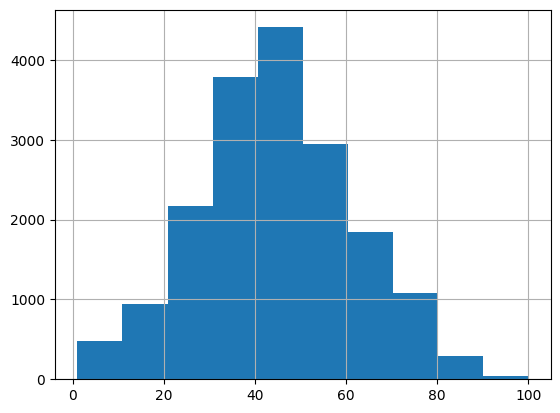

In [ ]:
df['Popularity'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c48088178e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c4808817e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c4808817700>],
 'medians': [<matplotlib.lines.Line2D at 0x7c480864c3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c480864c640>],
 'means': []}

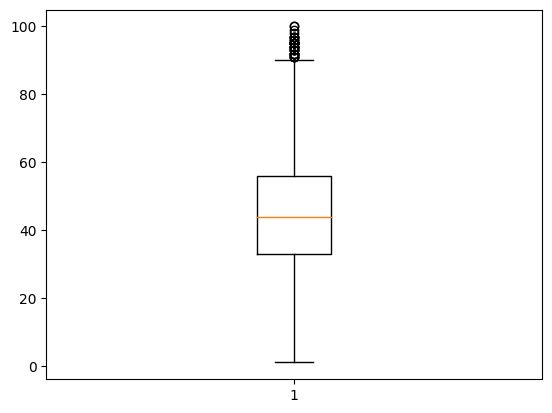

In [ ]:
plt.boxplot(x=df['Popularity'])

In [ ]:
clases=['Baja','Media', 'Alta']
clases

['Baja', 'Media', 'Alta']

###**danceability**

Es una variable numérica que almacena el nivel de "bailabilidad" de la canción

In [ ]:
#Estadísticas de la variable
df['danceability'].describe()

count    17996.000000
mean         0.543433
std          0.166268
min          0.059600
25%          0.432000
50%          0.545000
75%          0.659000
max          0.989000
Name: danceability, dtype: float64

<Axes: >

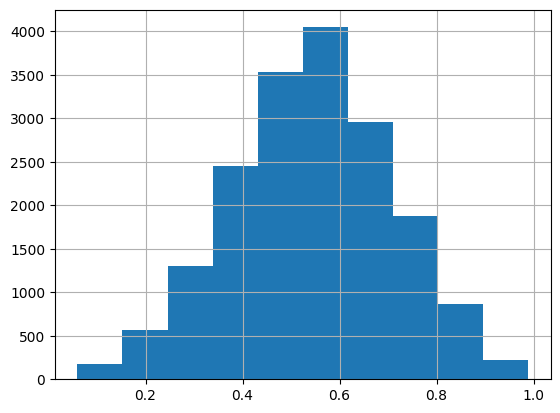

In [ ]:
df['danceability'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c480873d750>,
 'caps': [<matplotlib.lines.Line2D at 0x7c480873dc90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c480873d4b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c480873e1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c480873e470>],
 'means': []}

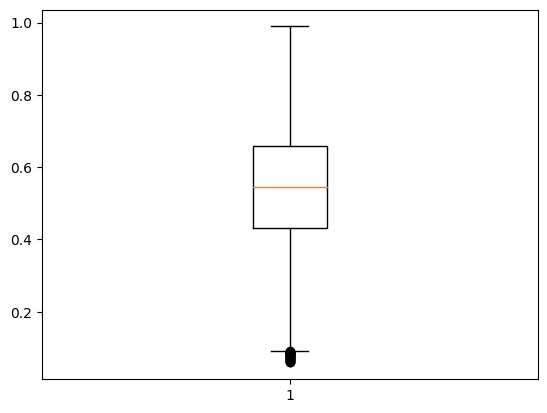

In [ ]:
plt.boxplot(x=df['danceability'])

###**energy**

Es una variable numérica que almacena el nivel de energía que transmite la canción

In [ ]:
#Estadísticas de la variable
df['energy'].describe()

count    17996.000000
mean         0.662777
std          0.235373
min          0.000020
25%          0.509000
50%          0.700000
75%          0.860000
max          1.000000
Name: energy, dtype: float64

<Axes: >

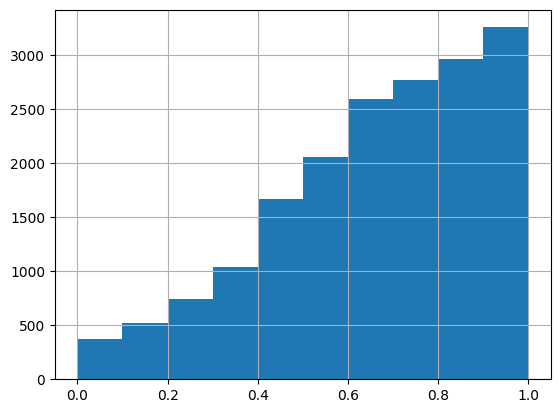

In [ ]:
df['energy'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c480863ad10>,
 'caps': [<matplotlib.lines.Line2D at 0x7c480863b130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c480863ab30>],
 'medians': [<matplotlib.lines.Line2D at 0x7c480863b670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c480863b910>],
 'means': []}

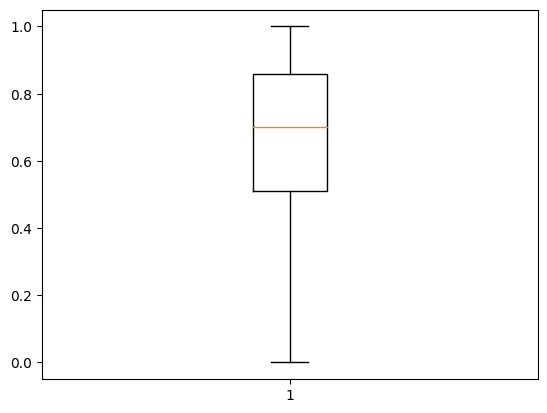

In [ ]:
plt.boxplot(x=df['energy'])

###**key**

Es una variable numérica entera que determina la clave de la canción

In [ ]:
#Estadísticas de la variable
df['key'].describe()

count    17996.000000
mean         5.952447
std          3.012651
min          1.000000
25%          4.000000
50%          5.952447
75%          8.000000
max         11.000000
Name: key, dtype: float64

<Axes: >

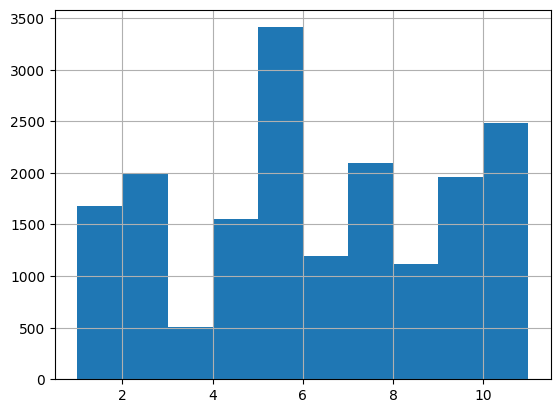

In [ ]:
df['key'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c480835c670>,
 'caps': [<matplotlib.lines.Line2D at 0x7c480835cbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c480835c3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c480835d0f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c480835d390>],
 'means': []}

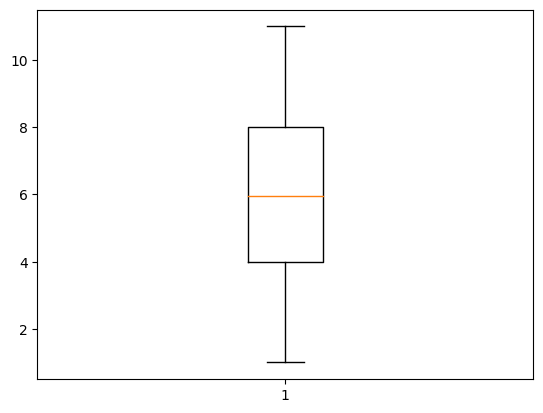

In [ ]:
plt.boxplot(x=df['key'])

###**loudness**

Es una variable numérica que determina el nivel de sonoridad de la canción

In [ ]:
#Estadísticas de la variable
df['loudness'].describe()

count    17996.000000
mean        -7.910660
std          4.049151
min        -39.952000
25%         -9.538000
50%         -7.016000
75%         -5.189000
max          1.355000
Name: loudness, dtype: float64

<Axes: >

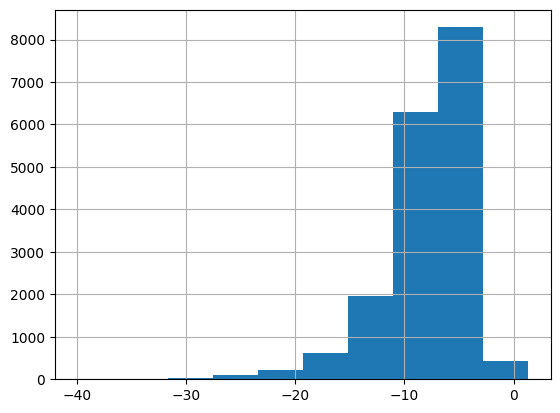

In [ ]:
df['loudness'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c4808270df0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c4808271330>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c4808270b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7c4808271870>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c4808271b10>],
 'means': []}

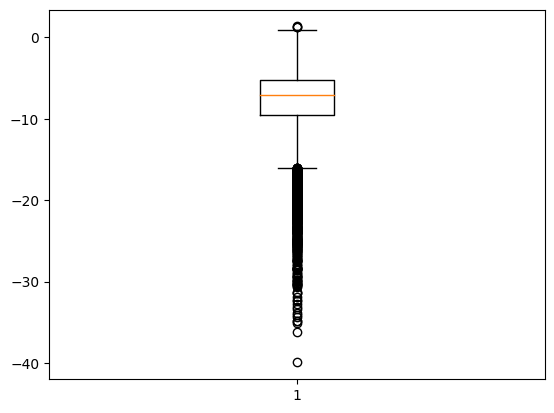

In [ ]:
plt.boxplot(x=df['loudness'])

###**speechiness**

Es una variable numérica que determina el nivel ...

In [ ]:
#Estadísticas de la variable
df['speechiness'].describe()

count    17996.000000
mean         0.079707
std          0.083576
min          0.022500
25%          0.034800
50%          0.047400
75%          0.083000
max          0.955000
Name: speechiness, dtype: float64

<Axes: >

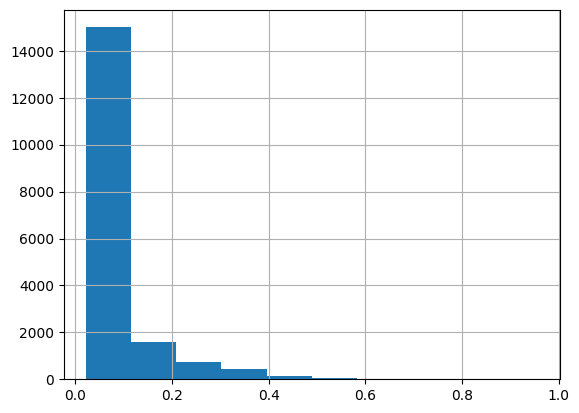

In [ ]:
df['speechiness'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c480815e9e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c480815ef20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c480815e740>],
 'medians': [<matplotlib.lines.Line2D at 0x7c480815f460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c480815f700>],
 'means': []}

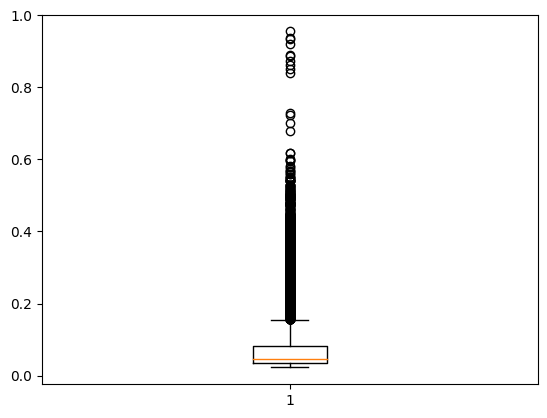

In [ ]:
plt.boxplot(x=df['speechiness'])

###**acousticness**


In [ ]:
#Estadísticas de la variable
df['acousticness'].describe()

count    17996.000000
mean         0.247082
std          0.310632
min          0.000000
25%          0.004300
50%          0.081400
75%          0.434000
max          0.996000
Name: acousticness, dtype: float64

<Axes: >

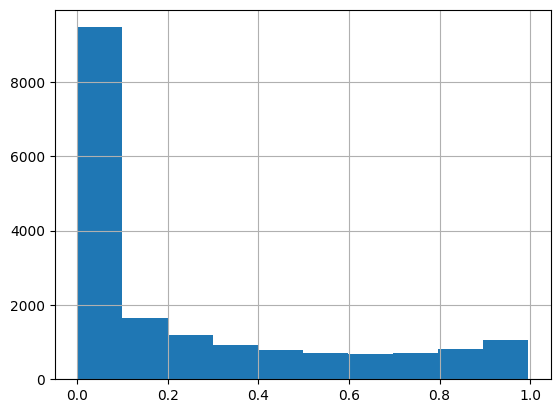

In [ ]:
df['acousticness'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c48082471f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c4808247730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c4808246f50>],
 'medians': [<matplotlib.lines.Line2D at 0x7c4808247c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c4808247f10>],
 'means': []}

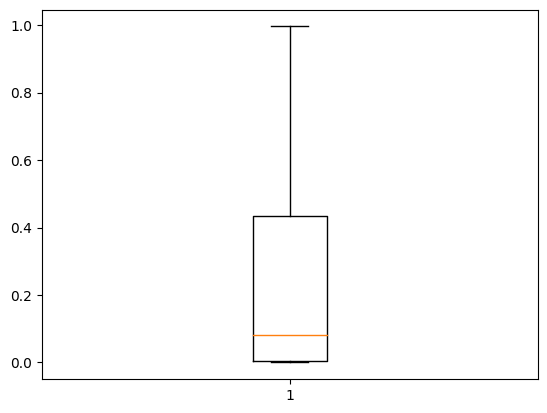

In [ ]:
plt.boxplot(x=df['acousticness'])

###**instrumentalness**

In [ ]:
#Estadísticas de la variable
df['instrumentalness'].describe()

count    17996.000000
mean         0.177562
std          0.264499
min          0.000001
25%          0.000294
50%          0.049850
75%          0.177562
max          0.996000
Name: instrumentalness, dtype: float64

<Axes: >

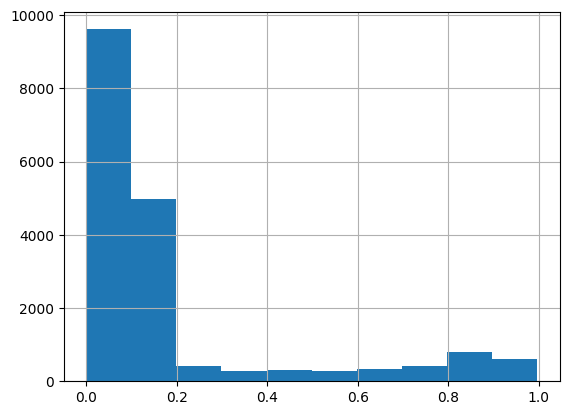

In [ ]:
df['instrumentalness'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c4807f644c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c4807f648e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c4807f64220>],
 'medians': [<matplotlib.lines.Line2D at 0x7c4807f64e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c4807f650c0>],
 'means': []}

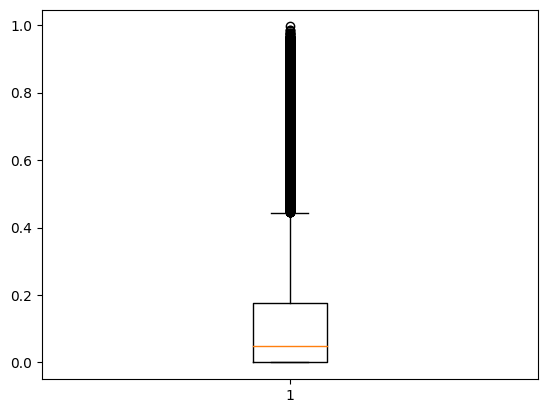

In [ ]:
plt.boxplot(x=df['instrumentalness'])

###**liveness**

In [ ]:
#Estadísticas de la variable
df['liveness'].describe()

count    17996.000000
mean         0.196170
std          0.159212
min          0.011900
25%          0.097500
50%          0.129000
75%          0.258000
max          1.000000
Name: liveness, dtype: float64

<Axes: >

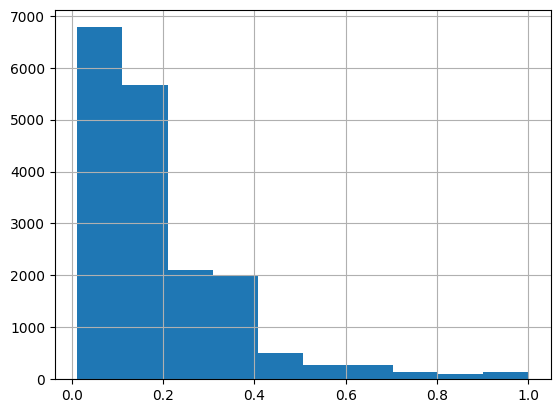

In [ ]:
df['liveness'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c4807e52920>,
 'caps': [<matplotlib.lines.Line2D at 0x7c4807e52e60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c4807e52680>],
 'medians': [<matplotlib.lines.Line2D at 0x7c4807e533a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c4807e53640>],
 'means': []}

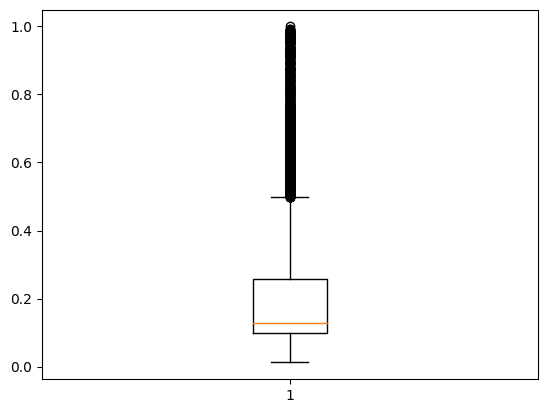

In [ ]:
plt.boxplot(x=df['liveness'])

###**valence**

In [ ]:
#Estadísticas de la variable
df['valence'].describe()

count    17996.000000
mean         0.486208
std          0.240195
min          0.018300
25%          0.297000
50%          0.481000
75%          0.672000
max          0.986000
Name: valence, dtype: float64

<Axes: >

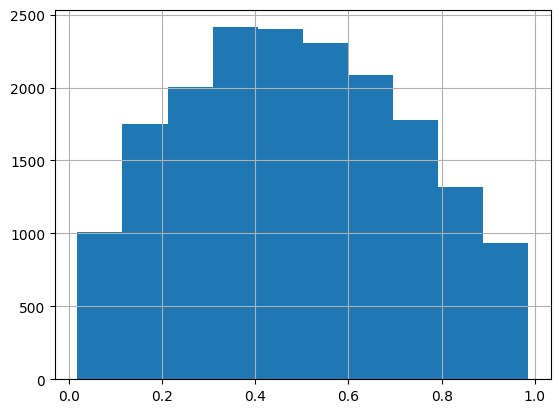

In [ ]:
df['valence'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c4807d62350>,
 'caps': [<matplotlib.lines.Line2D at 0x7c4807d62770>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c4807d62170>],
 'medians': [<matplotlib.lines.Line2D at 0x7c4807d62cb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c4807d62f50>],
 'means': []}

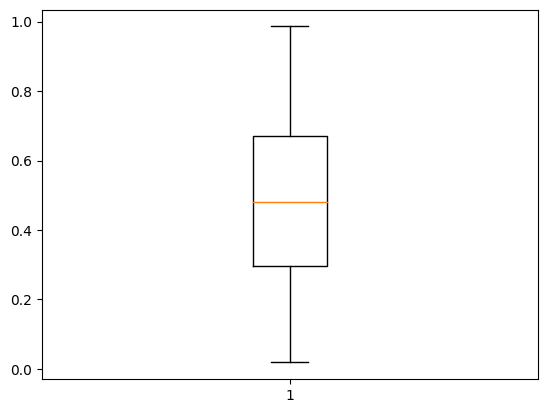

In [ ]:
plt.boxplot(x=df['valence'])

###**tempo**

In [ ]:
#Estadísticas de la variable
df['tempo'].describe()

count    17996.000000
mean       122.623294
std         29.571527
min         30.557000
25%         99.620750
50%        120.065500
75%        141.969250
max        217.416000
Name: tempo, dtype: float64

<Axes: >

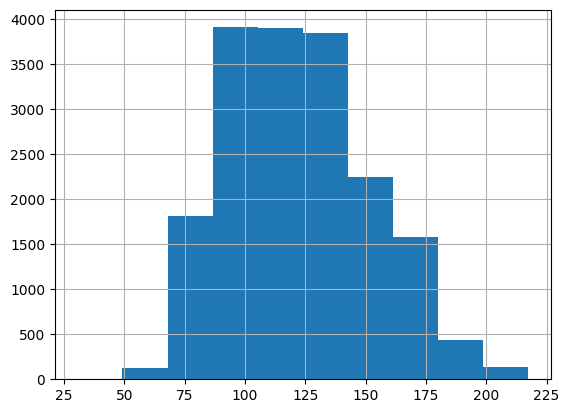

In [ ]:
df['tempo'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c4807c77280>,
 'caps': [<matplotlib.lines.Line2D at 0x7c4807c777c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c4807c76fe0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c4807c77d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c4807c77fa0>],
 'means': []}

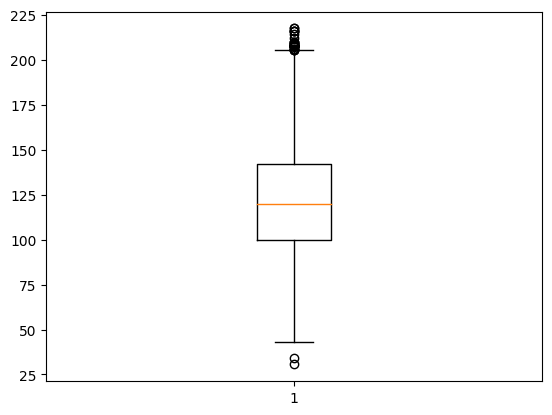

In [ ]:
plt.boxplot(x=df['tempo'])

###**duration_in min/ms**

In [ ]:
#Estadísticas de la variable
df['duration_in min/ms'].describe()

count    1.799600e+04
mean     2.007445e+05
std      1.119891e+05
min      5.016500e-01
25%      1.663370e+05
50%      2.091600e+05
75%      2.524900e+05
max      1.477187e+06
Name: duration_in min/ms, dtype: float64

<Axes: >

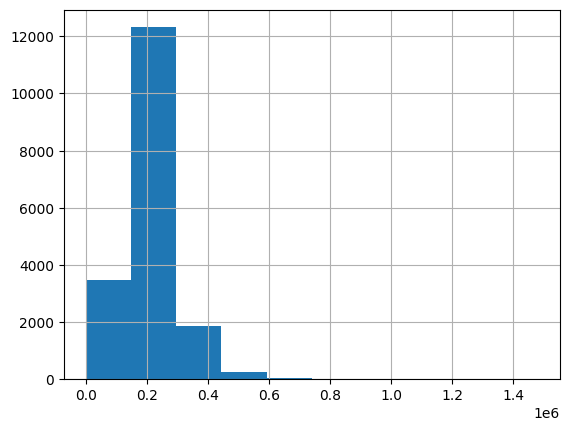

In [ ]:
df['duration_in min/ms'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c4807fe6c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7c4808224460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c4807fe6200>],
 'medians': [<matplotlib.lines.Line2D at 0x7c48082248e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c48083295d0>],
 'means': []}

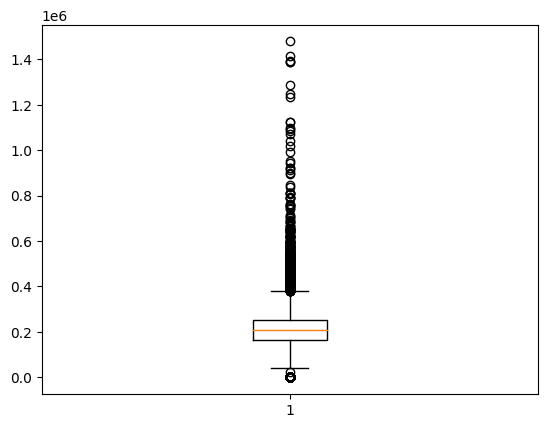

In [ ]:
plt.boxplot(x=df['duration_in min/ms'])

###**time_signature**

In [ ]:
#Estadísticas de la variable
df['time_signature'].describe()

count    17996.000000
mean         3.924039
std          0.361618
min          1.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: time_signature, dtype: float64

<Axes: >

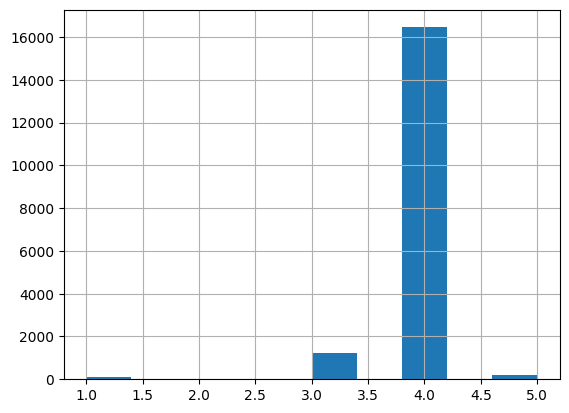

In [ ]:
df['time_signature'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c4807a91540>,
 'caps': [<matplotlib.lines.Line2D at 0x7c4807a91a80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c4807a912a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c4807a91fc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c4807a92260>],
 'means': []}

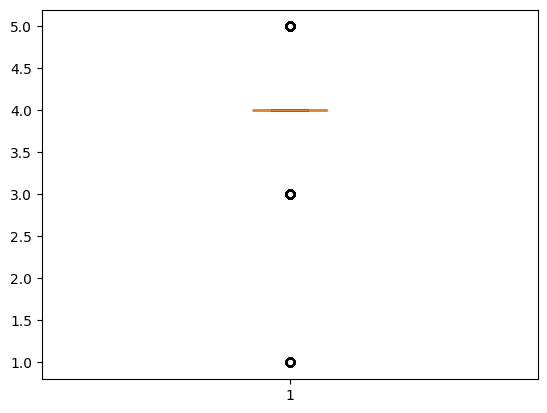

In [ ]:
plt.boxplot(x=df['time_signature'])

## **Variables categóricas**

### **Artist Name**
Es una variable categórica que describe el nombre del artista

In [ ]:
#Categorías de la variable
df['Artist Name'].unique()

array(['Bruno Mars', 'Boston', 'The Raincoats', ..., 'Micatone',
       'Smash Hit Combo', 'Beherit'], dtype=object)

In [ ]:
df['Artist Name'].value_counts()

Artist Name
Backstreet Boys    69
Westlife           60
Britney Spears     54
Omer Adam          48
Eyal Golan         48
                   ..
Rocky Trail         1
Smerz               1
lavender            1
Fear Culture        1
Beherit             1
Name: count, Length: 9149, dtype: int64

<Axes: xlabel='Artist Name'>

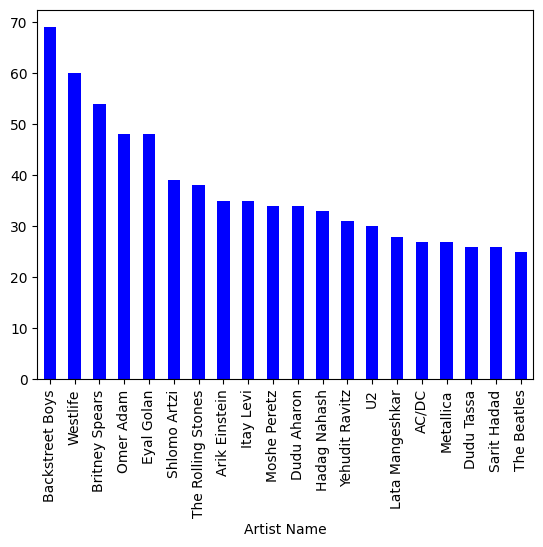

In [ ]:
df['Artist Name'].value_counts().head(20).plot(kind='bar', color='blue')

### **Track Name**
Es una variable categórica que describe el nombre de la canción.

In [ ]:
#Categorías de la variable
df['Track Name'].nunique()

15129

### **mode**
Es una variable categórica que describe el modo

In [ ]:
#Categorías de la variable
df['mode'].unique()

array([1, 0])

In [ ]:
df['mode'].value_counts().head(10)

mode
1    11459
0     6537
Name: count, dtype: int64

<Axes: xlabel='mode'>

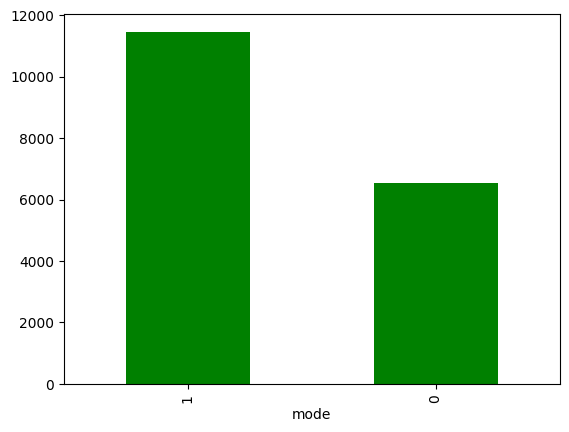

In [ ]:
df['mode'].value_counts().plot(kind='bar',color='green')

### **time_signature**


In [ ]:
#Categorías de la variable
df['time_signature'].unique()

array([4, 3, 1, 5])

In [ ]:
df['time_signature'].value_counts()

time_signature
4    16451
3     1228
5      203
1      114
Name: count, dtype: int64

<Axes: xlabel='time_signature'>

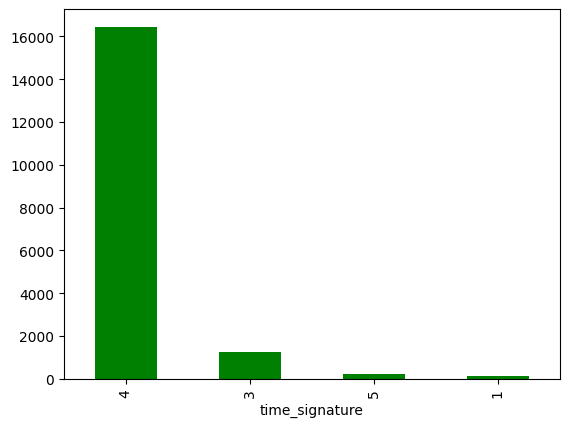

In [ ]:
df['time_signature'].value_counts().plot(kind='bar',color='green')

### **Class**
Es una variable categórica que describe la clasificación de la canción

In [ ]:
#Categorías de la variable
df['Class'].unique()

array(['HipHop', 'Rock', 'Indie', 'Blues', 'Country', 'Metal', 'Pop',
       'Bollywood', 'Instrumental', 'Alternative', 'Acoustic'],
      dtype=object)

In [ ]:
df['Class'].value_counts()

Class
Rock            4949
Indie           2587
Pop             2524
Metal           1854
HipHop          1447
Alternative     1373
Blues           1272
Acoustic         625
Instrumental     576
Bollywood        402
Country          387
Name: count, dtype: int64

<Axes: xlabel='Class'>

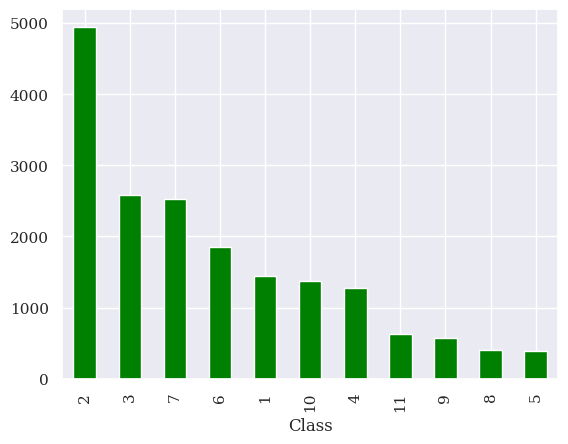

In [ ]:
df['Class'].value_counts().plot(kind='bar',color='green')

## **Conversión de variables categóricas**

In [ ]:
df['Class'].replace(('HipHop', 'Rock', 'Indie', 'Blues', 'Country', 'Metal', 'Pop','Bollywood', 'Instrumental', 'Alternative', 'Acoustic'),(1,2,3,4,5,6,7,8,9,10,11), inplace=True)
df['Popularidad']=pd.cut(x=df['Popularity'], bins=[0, 40, 60,100],labels=[1,2,3])
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Popularidad
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4,1,2
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,2,2
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,3,1
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4,1,3
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,3,1
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,4,1
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,6,1
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,6,1


# **Correlación entre variables**

Correlación entre variables

In [ ]:
corr_matriz=df[variables].corr()
corr_matriz.style.background_gradient()

,Popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Class
Popularity,1.000000,0.165462,0.050696,0.005471,0.122269,0.031305,-0.123409,-0.137549,-0.071693,0.054106,-0.005974,-0.048352
danceability,0.165462,1.000000,-0.093838,0.006319,0.059723,0.199042,0.009055,-0.174594,-0.109485,0.444548,-0.183527,-0.080361
energy,0.050696,-0.093838,1.000000,0.014953,0.767869,0.125427,-0.745963,-0.162967,0.195634,0.222998,0.210224,-0.209781
key,0.005471,0.006319,0.014953,1.000000,0.002493,0.001739,-0.008576,0.001169,0.014074,0.029887,0.013144,-0.010832
loudness,0.122269,0.059723,0.767869,0.002493,1.000000,0.096027,-0.612824,-0.318254,0.112022,0.181086,0.164272,-0.178611
speechiness,0.031305,0.199042,0.125427,0.001739,0.096027,1.000000,-0.086648,-0.046984,0.070406,0.053885,0.048948,-0.185127
acousticness,-0.123409,0.009055,-0.745963,-0.008576,-0.612824,-0.086648,1.000000,0.156548,-0.111393,-0.122547,-0.168318,0.272825
instrumentalness,-0.137549,-0.174594,-0.162967,0.001169,-0.318254,-0.046984,0.156548,1.000000,-0.041528,-0.202680,-0.033423,0.115105
liveness,-0.071693,-0.109485,0.195634,0.014074,0.112022,0.070406,-0.111393,-0.041528,1.000000,0.021076,0.033515,-0.051839
valence,0.054106,0.444548,0.222998,0.029887,0.181086,0.053885,-0.122547,-0.202680,0.021076,1.000000,0.051128,-0.114511


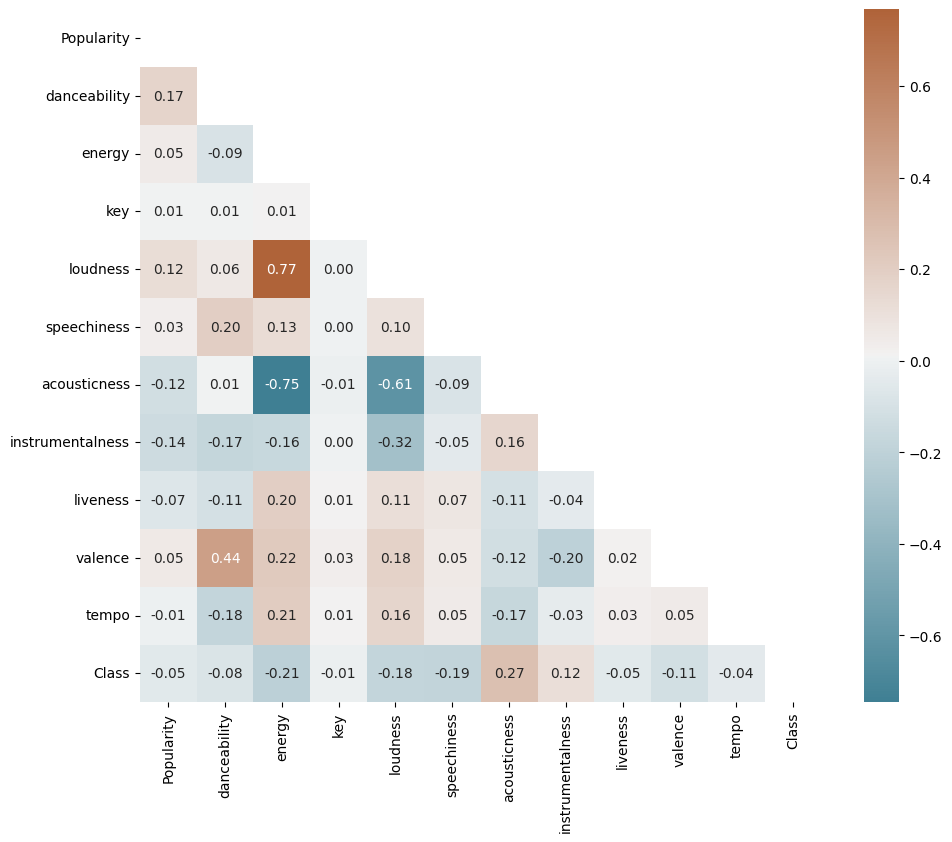

In [ ]:
plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr_matriz)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matriz, cmap=sns.diverging_palette(220, 30, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set()

In [ ]:
caracteristicas= ['danceability', 'energy', 'loudness', 'acousticness', 'valence']
caracteristicas

['danceability', 'energy', 'loudness', 'acousticness', 'valence']

Text(0.5, 1.0, 'Class')

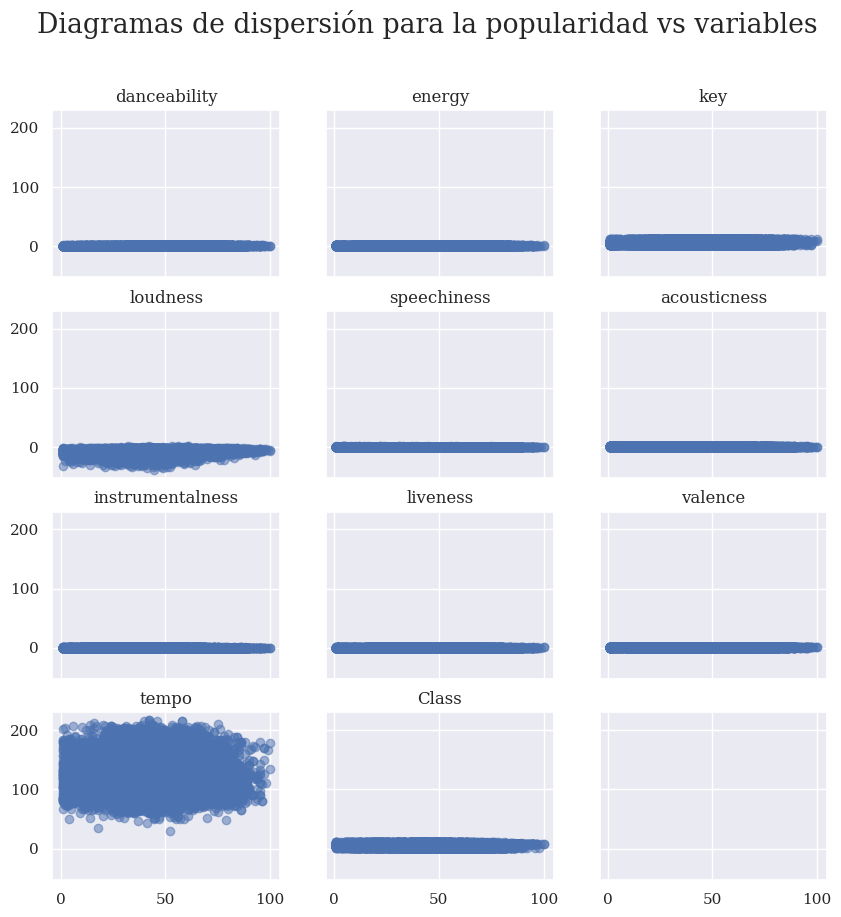

In [ ]:
fig, ax = plt.subplots(4, 3,sharex=True, sharey=True, figsize=(10,10))
fig.suptitle('Diagramas de dispersión para la popularidad vs variables')
ax[0,0].scatter(x=df.Popularity,y= df.danceability, alpha= 0.5)
ax[0,1].scatter(x=df.Popularity,y= df.energy, alpha= 0.5)
ax[0,2].scatter(x=df.Popularity,y= df.key, alpha= 0.5)
ax[1,0].scatter(x=df.Popularity,y= df.loudness, alpha= 0.5)
ax[1,1].scatter(x=df.Popularity,y= df.speechiness, alpha= 0.5)
ax[1,2].scatter(x=df.Popularity,y= df.acousticness, alpha= 0.5)
ax[2,0].scatter(x=df.Popularity,y= df.instrumentalness, alpha= 0.5)
ax[2,1].scatter(x=df.Popularity,y= df.liveness, alpha= 0.5)
ax[2,2].scatter(x=df.Popularity,y= df.valence, alpha= 0.5)
ax[3,0].scatter(x=df.Popularity,y= df.tempo, alpha= 0.5)
ax[3,1].scatter(x=df.Popularity,y= df.Class, alpha= 0.5)


ax[0,0].set_title('danceability')
ax[0,1].set_title('energy')
ax[0,2].set_title('key')
ax[1,0].set_title('loudness')
ax[1,1].set_title('speechiness')
ax[1,2].set_title('acousticness')
ax[2,0].set_title('instrumentalness')
ax[2,1].set_title('liveness')
ax[2,2].set_title('valence')
ax[3,0].set_title('tempo')
ax[3,1].set_title('Class')


---
# **Preparación de los datos**
---

Se preparan los datos para ser usados en los modelos.  Las categorías de cada una de las variables se convierten en números que faciliten el procesamiento.

## **Separación de los conjuntos de características y variable objetivo**

In [ ]:
X = df[caracteristicas]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   danceability  17996 non-null  float64
 1   energy        17996 non-null  float64
 2   loudness      17996 non-null  float64
 3   acousticness  17996 non-null  float64
 4   valence       17996 non-null  float64
dtypes: float64(5)
memory usage: 703.1 KB


In [ ]:
y = df['Popularidad']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 17996 entries, 0 to 17995
Series name: Popularidad
Non-Null Count  Dtype   
--------------  -----   
17996 non-null  category
dtypes: category(1)
memory usage: 17.8 KB


## **Normalización de los datos**

In [ ]:
scaler= MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [ ]:
X_scaled=scaler.transform(X)
X_scaled

array([[8.54744997e-01, 5.63991149e-01, 8.47023507e-01, 1.71686747e-02,
        9.10096104e-01],
       [3.46890467e-01, 8.13996224e-01, 7.92165977e-01, 1.10441767e-03,
        5.69081327e-01],
       [4.02840542e-01, 6.13992164e-01, 7.65439272e-01, 4.87951807e-01,
        7.94357756e-01],
       ...,
       [5.36259953e-01, 9.80999614e-01, 8.53826228e-01, 2.98192771e-05,
        2.51834246e-01],
       [1.67204648e-01, 8.04996041e-01, 6.58362989e-01, 1.29518072e-03,
        3.47938411e-01],
       [3.66257801e-01, 8.52997016e-01, 8.38405113e-01, 6.06425703e-03,
        3.70672729e-01]])

---
# **Partición de la base de datos**
---

Se distribuyen los datos de la base de datos entre datos de entrenamiento y datos de prueba, para ser usados posteriormente en los diferentes modelos

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 70% para entrenamiento, 30% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [ ]:
X_train

array([[6.69679363e-01, 7.79995534e-01, 7.26365991e-01, 1.14457831e-02,
        3.08670042e-01],
       [6.32020658e-01, 5.37990621e-01, 7.35468565e-01, 2.27911647e-01,
        1.47463057e-01],
       [5.39487842e-01, 3.97987779e-01, 6.56159973e-01, 6.88755020e-01,
        3.56205436e-01],
       ...,
       [9.18872391e-02, 9.76999533e-01, 8.44239475e-01, 1.12449799e-05,
        7.61599669e-02],
       [3.42586615e-01, 6.10992103e-01, 8.12356259e-01, 9.31726908e-04,
        1.45396301e-01],
       [8.42909404e-01, 5.63991149e-01, 8.15479217e-01, 5.63253012e-02,
        7.43722228e-01]])

In [ ]:
y_train

879      2
9757     2
3699     1
4482     3
12851    1
        ..
9225     1
13123    2
9845     1
10799    1
2732     2
Name: Popularidad, Length: 12597, dtype: category
Categories (3, int64): [1 < 2 < 3]

---
# **Modelos de aprendizaje supervisado**
---

---
## **Modelo de Regresión Logística**
---

Se debe establecer y resolver el modelo de regresión logística que determine la ecuación representativa de la situación

In [ ]:
# Crear el modelo de regresión lineal
lr = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
lr.fit(X_train, y_train)
score_train=lr.score(X_train, y_train)
int_log=lr.intercept_[0]
coe_log=lr.coef_[0]

---
### **Evaluación del modelo**
---

In [ ]:
# Realizar predicciones sobre los datos de prueba
y_pred_lr = lr.predict(X_test)

In [ ]:
score_test=lr.score(X_test, y_test)
print("Score datos de entrenamiento:", score_train)
print("Score datos de prueba       :", score_test)

Score datos de entrenamiento: 0.44589981741684526
Score datos de prueba       : 0.4600852009631413


El modelo de regresión logística ha mostrado limitaciones en la clasificación de géneros musicales, con una precisión moderada tanto en el entrenamiento como en la prueba. Esto sugiere que el modelo no es el más adecuado para este tipo de problema, que probablemente requiere la captura de relaciones más complejas entre las variables.

### __Métricas de desempeño__

Así mismo se pueden calcular las métricas de desempeño de este modelo

In [ ]:
print(classification_report(y_test, y_pred_lr, target_names=clases))

              precision    recall  f1-score   support

        Baja       0.48      0.57      0.52      2211
       Media       0.44      0.54      0.48      2235
        Alta       0.35      0.02      0.04       953

    accuracy                           0.46      5399
   macro avg       0.42      0.38      0.35      5399
weighted avg       0.44      0.46      0.42      5399



In [ ]:
lrp, lrr, lrs, lru =precision_recall_fscore_support(y_test, y_pred_lr, average= 'macro')
lr_metricas=['Regresión logística', lrp, lrr, lrs]
lr_metricas

['Regresión logística',
 0.424817840520975,
 0.37652385325629206,
 0.34905786187524496]

### __Matriz de confusión__
Para evaluar el modelo lo primero es generar la matriz de confusión

In [ ]:
lr_cm = confusion_matrix(y_test , y_pred_lr)
print ("Confusion Matrix: \n", lr_cm)

Confusion Matrix: 
 [[1261  938   12]
 [1007 1203   25]
 [ 338  595   20]]


Y mostrado de forma gráfica sería:

Text(0.5, 1.0, 'Matriz de confusión - Regresión Logística')

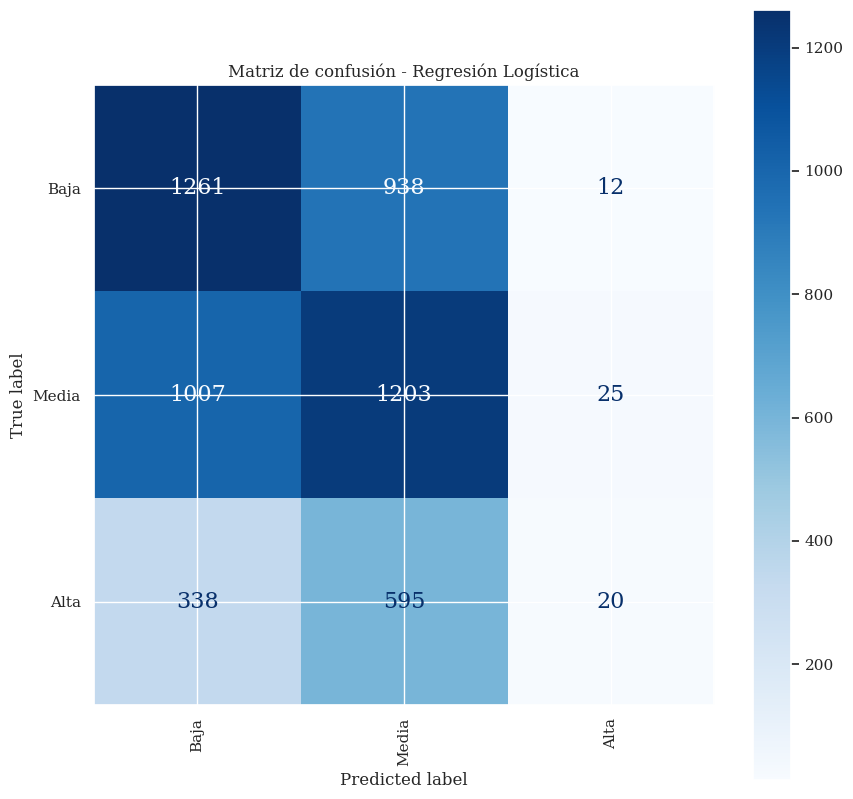

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(lr,
                                             X_test,
                                             y_test,
                                             display_labels=clases,
                                             cmap=plt.cm.Blues,
                                             ax=axes,
                                             xticks_rotation='vertical'
                                             )
disp.ax_.set_title('Matriz de confusión - Regresión Logística')

## **Árbol de decisión**

In [ ]:
# Crear el modelo de regresión lineal
dt = DecisionTreeClassifier(max_depth = 7,random_state = 48)

# Entrenar el modelo con los datos de entrenamiento
dt.fit(X_train, y_train)
score_train=dt.score(X_train, y_train)
score_train

0.493530205604509

---
### **Evaluación del modelo**
---

In [ ]:
# Realizar predicciones sobre los datos de prueba
y_pred_dt = dt.predict(X_test)

In [ ]:
score_test=dt.score(X_test, y_test)
print("Score datos de entrenamiento:", score_train)
print("Score datos de prueba       :", score_test)

Score datos de entrenamiento: 0.493530205604509
Score datos de prueba       : 0.4710131505834414


El modelo de árbol de decisión ha mostrado limitaciones en la clasificación de géneros musicales, con una precisión razonable en el conjunto de entrenamiento (53.34%) pero una caída en la precisión en el conjunto de prueba (47.60%).

### __Métricas de desempeño__

Así mismo se pueden calcular las métricas de desempeño de este modelo

In [ ]:
print(classification_report(y_test, y_pred_dt, target_names=clases))

              precision    recall  f1-score   support

        Baja       0.48      0.60      0.53      2211
       Media       0.46      0.53      0.50      2235
        Alta       0.39      0.02      0.03       953

    accuracy                           0.47      5399
   macro avg       0.44      0.38      0.35      5399
weighted avg       0.46      0.47      0.43      5399



In [ ]:
dtp, dtr, dts, dtu =precision_recall_fscore_support(y_test, y_pred_dt, average= 'macro')
dt_metricas=['Árbol de decisión', dtp, dtr, dts]
dt_metricas

['Árbol de decisión',
 0.44304735163423414,
 0.38483630891393555,
 0.35478565982019994]

### __Matriz de confusión__
Para evaluar el modelo lo primero es generar la matriz de confusión

In [ ]:
dt_cm = confusion_matrix(y_test , y_pred_dt)
print ("Confusion Matrix: \n", dt_cm)

Confusion Matrix: 
 [[1332  872    7]
 [1021 1194   20]
 [ 420  516   17]]


Y mostrado de forma gráfica sería:

Text(0.5, 1.0, 'Matriz de confusión - Arbol de decisión')

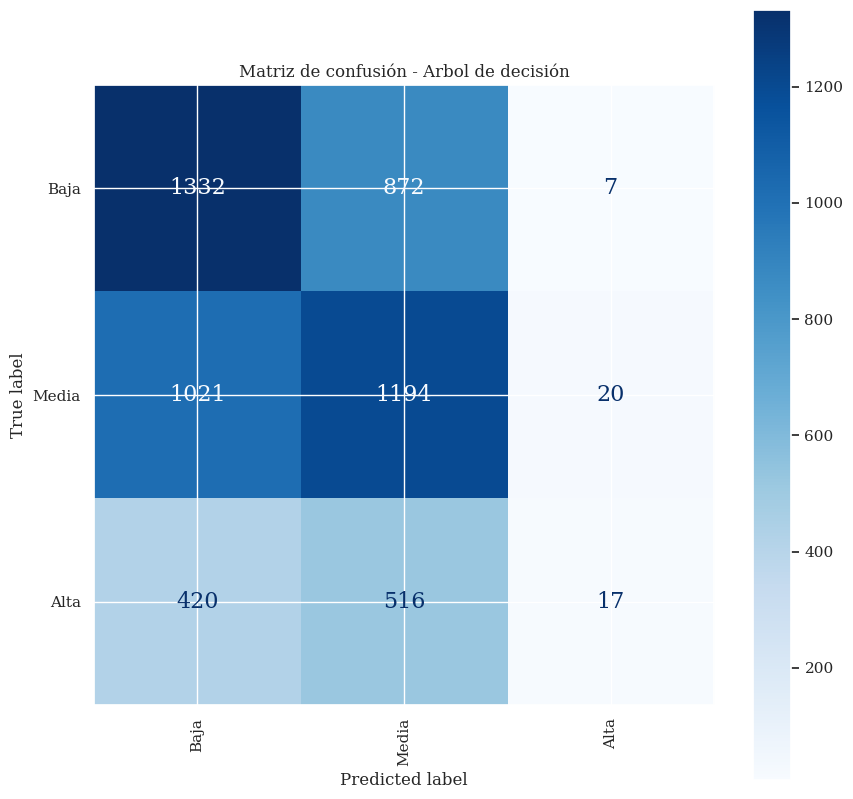

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(dt,
                                             X_test,
                                             y_test,
                                             display_labels=clases,
                                             cmap=plt.cm.Blues,
                                             ax=axes,
                                             xticks_rotation='vertical'
                                             )
disp.ax_.set_title('Matriz de confusión - Arbol de decisión')

---
## **Random Forest**
---

In [ ]:
# Crear el modelo de regresión lineal
rf = RandomForestClassifier(max_depth = 7,random_state = 48)

# Entrenar el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)
score_train=rf.score(X_train, y_train)
score_train

0.544574104945622

---
### **Evaluación del modelo**
---

In [ ]:
# Realizar predicciones sobre los datos de prueba
y_pred_rf = rf.predict(X_test)

In [ ]:
score_test=rf.score(X_test, y_test)
print("Score datos de entrenamiento:", score_train)
print("Score datos de prueba       :", score_test)

Score datos de entrenamiento: 0.544574104945622
Score datos de prueba       : 0.4871272457862567


El modelo de Random Forest ha mostrado un rendimiento superior en comparación con la regresión logística y el árbol de decisión, con una precisión de 57.42% en el conjunto de entrenamiento y 52.12% en el conjunto de prueba.

### __Matriz de confusión__
Para evaluar el modelo lo primero es generar la matriz de confusión

In [ ]:
rf_cm = confusion_matrix(y_test , y_pred_rf)
print ("Confusion Matrix: \n", rf_cm)

Confusion Matrix: 
 [[1235  965   11]
 [ 832 1367   36]
 [ 312  613   28]]


Y mostrado de forma gráfica sería:

Text(0.5, 1.0, 'Matriz de Confusión - Random Forest')

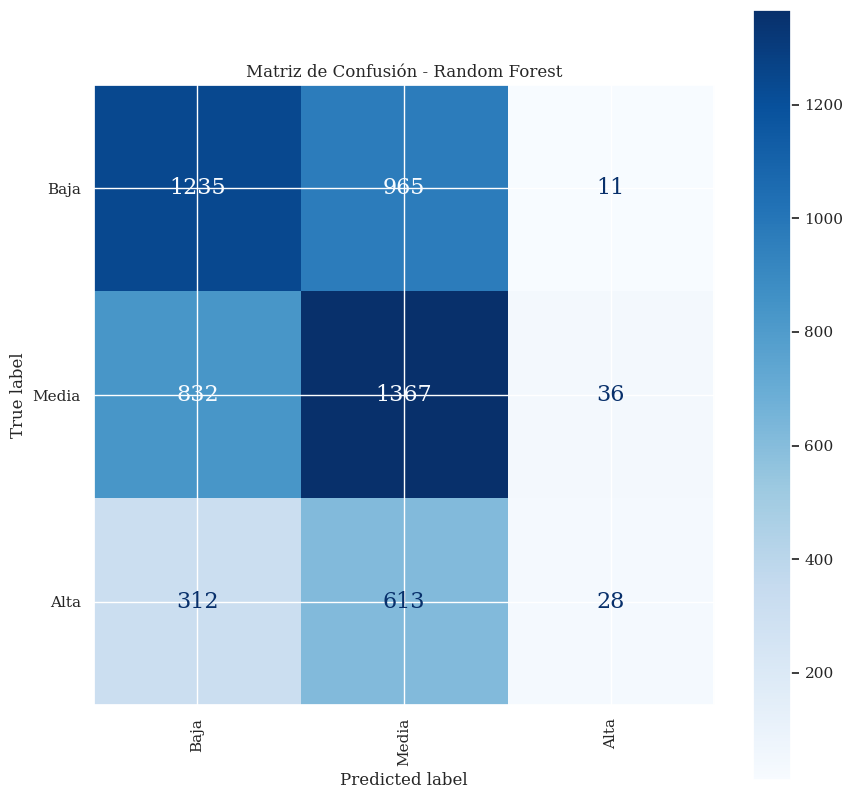

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(rf,
                                             X_test,
                                             y_test,
                                             display_labels=clases,
                                             cmap=plt.cm.Blues,
                                             ax=axes,
                                             xticks_rotation='vertical'
                                             )
disp.ax_.set_title('Matriz de Confusión - Random Forest')

### __Métricas de desempeño__

Así mismo se pueden calcular las métricas de desempeño de este modelo

In [ ]:
print(classification_report(y_test, y_pred_rf, target_names=clases))

              precision    recall  f1-score   support

        Baja       0.52      0.56      0.54      2211
       Media       0.46      0.61      0.53      2235
        Alta       0.37      0.03      0.05       953

    accuracy                           0.49      5399
   macro avg       0.45      0.40      0.37      5399
weighted avg       0.47      0.49      0.45      5399



In [ ]:
rfp, rfr, rfs, rfu =precision_recall_fscore_support(y_test, y_pred_rf, average= 'macro')
rf_metricas=['Random forest', rfp, rfr, rfs]
rf_metricas

['Random forest', 0.4522118622839489, 0.3998615981614992, 0.37346676587540245]

---
## **Comparación entre modelos**
---

In [ ]:
metricas=[lr_metricas, dt_metricas,rf_metricas]
df_metricas=pd.DataFrame(metricas, columns=['Classifier','Precission','Recall', 'F1 Score'])
df_metricas.style.background_gradient()

,Classifier,Precission,Recall,F1 Score
0,Regresión logística,0.424818,0.376524,0.349058
1,Árbol de decisión,0.443047,0.384836,0.354786
2,Random forest,0.452212,0.399862,0.373467


---
# **Modelos de aprendizaje no supervisado**
---

Escenario

In [ ]:
df_rock=df[df['Class'] ==1]

In [ ]:
df_rock=df[df['Class'] ==1]
df_rock

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Popularidad
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.000000,-4.964,1,0.0485,0.0171,0.177562,0.0849,0.899,134.071,234596.0,4,1,2
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.000000,-6.528,0,0.0555,0.0212,0.177562,0.1220,0.569,107.033,173968.0,4,1,3
19,DaBaby,Baby Sitter (feat. Offset),70.0,0.852,0.730,1.000000,-5.803,1,0.0579,0.0219,0.177562,0.3360,0.394,92.506,157693.0,4,1,3
22,Krankhead,Cut Throat,29.0,0.805,0.448,7.000000,-9.452,1,0.1120,0.0602,0.000002,0.1130,0.775,160.018,138000.0,4,1,1
33,Dreezy,Where Them $ @,42.0,0.858,0.525,5.952447,-7.332,1,0.1480,0.0443,0.007380,0.1970,0.351,170.875,193962.0,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17944,JayDaYoungan,Spot Em,52.0,0.653,0.628,5.000000,-8.446,0,0.3820,0.2120,0.177562,0.0945,0.809,164.861,170917.0,4,1,2
17950,Aretha Franklin,Until You Come Back to Me (That's What I'm Gon...,53.0,0.664,0.634,2.000000,-6.348,1,0.0349,0.6830,0.000033,0.2210,0.666,93.914,208467.0,4,1,2
17955,Tuna,◊ß◊ú◊ê◊†◊í,34.0,0.748,0.582,5.000000,-6.222,0,0.0595,0.0869,0.000001,0.8140,0.199,113.013,258743.0,4,1,1
17972,Kanye West,Touch The Sky,69.0,0.552,0.846,9.000000,-4.912,1,0.3420,0.0114,0.177562,0.3090,0.554,98.560,236600.0,1,1,3


In [ ]:
df_rock[caracteristicas]

,danceability,energy,loudness,acousticness,valence
0,0.854,0.564,-4.964,0.0171,0.899
3,0.853,0.597,-6.528,0.0212,0.569
19,0.852,0.730,-5.803,0.0219,0.394
22,0.805,0.448,-9.452,0.0602,0.775
33,0.858,0.525,-7.332,0.0443,0.351
...,...,...,...,...,...
17944,0.653,0.628,-8.446,0.2120,0.809
17950,0.664,0.634,-6.348,0.6830,0.666
17955,0.748,0.582,-6.222,0.0869,0.199
17972,0.552,0.846,-4.912,0.0114,0.554


## **Escalización de variables**

In [ ]:
mmscaler= MinMaxScaler()
mmscaler.fit(df_rock[caracteristicas])

MinMaxScaler()

In [ ]:
datascaled=mmscaler.transform(df_rock[caracteristicas])
datascaled

array([[0.8413631 , 0.55953128, 0.81231769, 0.01716904, 0.92086408],
       [0.84018801, 0.59405733, 0.75456929, 0.02128971, 0.56796065],
       [0.83901293, 0.73320778, 0.78133885, 0.02199324, 0.38081489],
       ...,
       [0.71680376, 0.57836367, 0.76586789, 0.087321  , 0.17228104],
       [0.48648649, 0.85457209, 0.81423771, 0.0114403 , 0.55191958],
       [0.28907168, 0.82736974, 0.85057047, 0.39898465, 0.43107689]])

## **Modelo K-Means**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans.fit(datascaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[0.60760111, 0.52203905, 0.64511856, 0.57886697, 0.5042884 ],
       [0.67459813, 0.61334822, 0.72994571, 0.1027457 , 0.32612043],
       [0.73371744, 0.70702557, 0.73927324, 0.14283191, 0.72278087]])

In [ ]:
kmeans.inertia_

136.28575650299985

## **Análisis de componentes principales**

In [ ]:
pca=PCA(n_components=2)
componentes=pca.fit_transform(datascaled)
componentes

array([[-0.37103996,  0.07317736],
       [-0.11778459, -0.13277039],
       [-0.04802594, -0.26487993],
       ...,
       [ 0.22921604, -0.31399847],
       [-0.15943268, -0.17090191],
       [ 0.14962794,  0.06472041]])

In [ ]:
pca.explained_variance_ratio_

array([0.38083832, 0.30606352])

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.6869018417187094

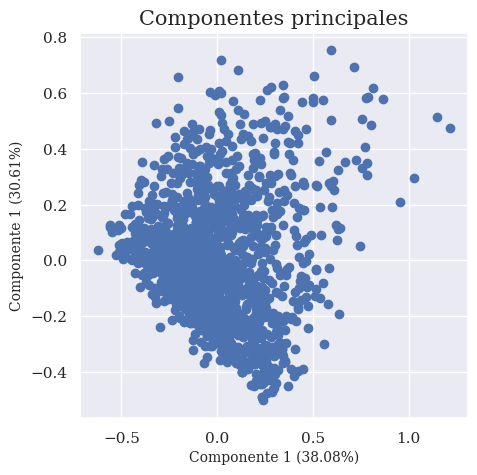

In [ ]:
fig=plt.figure(figsize=(5,5))
plt.rcParams['font.family']= 'serif'
x_label= 'Componente 1 (' + str(round(pca.explained_variance_ratio_[0]*100,2))+'%)'
y_label= 'Componente 1 (' + str(round(pca.explained_variance_ratio_[1]*100,2))+'%)'
ax=fig.add_subplot(1,1,1)
ax.set_xlabel(x_label, fontsize=10)
ax.set_ylabel(y_label, fontsize=10)
ax.set_title('Componentes principales',fontsize=15)
ax.scatter(x=componentes[:,0], y= componentes[:,1])


1. Regresión Logística:

Precisión: 0.422136
Recall: 0.382562
F1 Score: 0.357243
Conclusión: La regresión logística ha mostrado el menor rendimiento entre los tres modelos. Si bien es un modelo simple y fácil de interpretar, no captura bien las complejidades de los datos, reflejado en sus métricas más bajas.

2. Árbol de Decisión:

Precisión: 0.444813
Recall: 0.418911
F1 Score: 0.420500
Conclusión: El árbol de decisión ha mejorado las métricas en comparación con la regresión logística. Sin embargo, todavía presenta limitaciones en términos de generalización, lo que indica que, aunque puede capturar mejor las relaciones en los datos, aún no es suficientemente robusto para un rendimiento óptimo.

3. Random Forest:

Precisión: 0.487944
Recall: 0.432655
F1 Score: 0.412643
Conclusión: El modelo de Random Forest ha mostrado el mejor rendimiento en términos de precisión y recall. Esto es consistente con la naturaleza del modelo, que combina múltiples árboles de decisión para mejorar la robustez y reducir el sobreajuste. Aún así, existe margen para mejorar, especialmente considerando la diferencia entre las métricas de entrenamiento y prueba.

Se han evaluado tres modelos de aprendizaje supervisado para la clasificación de géneros musicales: Regresión Logística, Árbol de Decisión y Random Forest.

# **Conclusiones**

El modelo de Random Forest ha demostrado ser el mejor en esta comparación, logrando la mayor precisión (0.487944), recall (0.432655) y F1 Score (0.412643). Sin embargo, todas las métricas indican que los modelos tienen dificultades para capturar las complejidades del conjunto de datos de clasificación de géneros musicales.

Recomendaciones para Mejorar el Rendimiento

1. Ajuste de Hiperparámetros:
Para cada modelo, se debe realizar una búsqueda exhaustiva de hiperparámetros (como Grid Search o Random Search) para optimizar su rendimiento.

2. Preprocesamiento de Datos:
Mejorar la ingeniería de características y el preprocesamiento de datos, considerando técnicas como la normalización, estandarización, y la creación de nuevas características relevantes.

3. Métodos de Ensamblado:
Considerar el uso de métodos de ensamblado más avanzados, como Gradient Boosting Machines (GBM), Extreme Gradient Boosting (XGBoost) o LightGBM, que a menudo superan tanto a los árboles de decisión simples como a Random Forest.

4. Validación Cruzada:
Utilizar la validación cruzada para obtener una estimación más precisa de la capacidad de generalización de los modelos y evitar el sobreajuste.

Se realizó una exploración utilizando dos técnicas de aprendizaje no supervisado: K-means y Análisis por Componentes Principales (PCA). Los resultados indicaron que no se obtuvieron mecanismos de clasificación consistentes y los modelos no evidenciaron clusters de clasificación concluyentes.

---
# **Referencias**
---

Music Genre Classification

1.   https://www.kaggle.com/datasets/fedeschmidt/music-genre-classification-ia

